In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from env import user, password, host
from wrangle import wrangle_zillow
from prepare import train_validate_test_split
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor

In [2]:
df = wrangle_zillow()

df.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips,transactiondate,County
0,2.0,3,1048,380118,1952,6037,2017-01-13,Los Angeles County
1,2.0,3,1324,518089,1963,6037,2017-01-13,Los Angeles County
3,3.0,4,2519,106406,1965,6037,2017-01-13,Los Angeles County
4,2.0,3,1285,369853,1955,6037,2017-01-13,Los Angeles County
5,1.0,3,1254,65848,1954,6037,2017-01-13,Los Angeles County


In [3]:
train, validate, test = train_validate_test_split(df)

train.shape, validate.shape, test.shape

((27773, 8), (11903, 8), (9920, 8))

In [4]:
train.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips,transactiondate,County
51278,1.0,3,944,119668,1960,6111,2017-08-31,Ventura County
30633,2.0,4,2395,919553,1922,6037,2017-06-13,Los Angeles County
1069,2.5,3,1438,390871,1964,6059,2017-01-06,Orange County
5125,1.0,3,1142,58361,1947,6037,2017-02-15,Los Angeles County
15166,2.0,3,1279,396326,1956,6037,2017-03-24,Los Angeles County


In [5]:
X_train = train.drop(columns=['yearbuilt', 'fips', 'transactiondate','County', 'taxvaluedollarcnt'])
X_train.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet
51278,1.0,3,944
30633,2.0,4,2395
1069,2.5,3,1438
5125,1.0,3,1142
15166,2.0,3,1279


In [6]:
#im going to try and scale the data 
import sklearn.preprocessing

In [7]:
#Assign the scaler to a variable, and fit/transform the training data
mms = sklearn.preprocessing.MinMaxScaler()

mms.fit(X_train)

train_mms = mms.transform(X_train)

In [8]:
#Is there a mistake here?
pd.DataFrame(train_mms, columns=list(X_train.columns)).head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet
0,0.0,0.4,0.108761
1,0.2,0.6,0.308020
2,0.3,0.4,0.176600
3,0.0,0.4,0.135952
4,0.2,0.4,0.154765


Text(0.5, 1.0, 'Scaled')

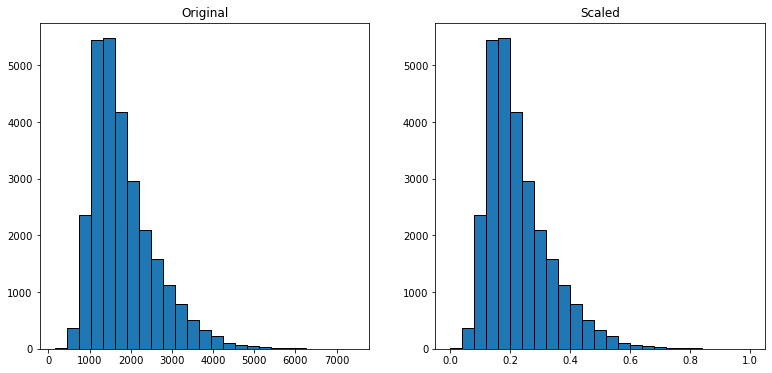

In [9]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train['calculatedfinishedsquarefeet'], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_mms[:,2], bins=25, ec='black')
plt.title('Scaled')

In [ ]:
ss = sklearn.preprocessing.StandardScaler()

ss.fit(X_train)

train_ss = ss.transform(X_train)

In [ ]:
pd.DataFrame(train_ss, columns=list(X_train.columns)).head()

In [ ]:
#Visualize the difference
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train['calculatedfinishedsquarefeet'], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_ss[:,2], bins=25, ec='black')
plt.title('Scaled')

In [ ]:
rs = sklearn.preprocessing.RobustScaler()

rs.fit(X_train)

train_rs = rs.transform(X_train)

In [ ]:
pd.DataFrame(train_rs, columns=list(X_train.columns)).head()

In [ ]:
#Visualize the data before and after robust scaling
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train['bathroomcnt'], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_rs[:,1], bins=25, ec='black')
plt.title('Scaled')

In [ ]:
mms.inverse_transform(train_mms)

In [ ]:
pd.DataFrame(mms.inverse_transform(train_mms))

In [ ]:
train.head()

In [ ]:
X_train.head()

In [12]:
from sklearn.preprocessing import MinMaxScaler

#Define function to scale all data based on the train subset
def scale_data(train, validate, test):
    
    scale_columns = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet']
    
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    
    mms = MinMaxScaler()
    
    mms.fit(train[scale_columns])
    
    train_scaled[scale_columns] = mms.transform(train[scale_columns])
    validate_scaled[scale_columns] = mms.transform(validate[scale_columns])
    test_scaled[scale_columns] = mms.transform(test[scale_columns])
    
    return train_scaled, validate_scaled, test_scaled

In [13]:
train_s, valid_s, test_s = scale_data(train, validate, test)

In [14]:
train_s.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips,transactiondate,County
51278,0.0,0.4,0.108761,119668,1960,6111,2017-08-31,Ventura County
30633,0.2,0.6,0.308020,919553,1922,6037,2017-06-13,Los Angeles County
1069,0.3,0.4,0.176600,390871,1964,6059,2017-01-06,Orange County
5125,0.0,0.4,0.135952,58361,1947,6037,2017-02-15,Los Angeles County
15166,0.2,0.4,0.154765,396326,1956,6037,2017-03-24,Los Angeles County


# Exploring the data 

What are we looking for innitally ?

We want to be able to predict the property tax assessed values `('taxvaluedollarcnt')` of Single Family Properties that had a transaction during 2017.

We have a model already, but we are hoping your insights can help us improve it. I need recommendations on a way to make a better model. Maybe you will create a new feature out of existing ones that works better, try a non-linear regression algorithm, or try to create a different model for each county. Whatever you find that works (or doesn't work) will be useful. Given you have just joined our team, we are excited to see your outside perspective.

One last thing, Zach lost the email that told us where these properties were located. Ugh, Zach :-/. Because property taxes are assessed at the county level, we would like to know what states and counties these are located in.

In [ ]:
train.info()

In [ ]:
fig, ax =plt.subplots(1,2, figsize=(12,6))
sns.countplot(train['bathroomcnt'], ax=ax[0])
sns.countplot(train['bedroomcnt'], ax=ax[1])
fig.show()

In [ ]:
sns.histplot(data=train, x= 'calculatedfinishedsquarefeet')

In [ ]:
sns.histplot(data=train, x= 'calculatedfinishedsquarefeet')

In [ ]:
sns.histplot(data=train, x= 'County')

In [ ]:
train.describe().T

In [ ]:
train.corr()

In [ ]:
sns.heatmap(train.corr(), cmap='mako', center=0, annot=True)
plt.show()

In [ ]:
train.head()

Question 1- Is there a relationship with the number of bathrroms a property has and the property value ?
 - categorical & Quantative 
 - T TEST OR ANOVA
Question 2 - does a prperty with a certain number of bathrooms cause an increase in property value?
 - categorical & quant 
 - CHI SQARED 
Question 3- does the number of square feet have a relationship with the county the property is in?
- categorical and cont
- t test or anova
question 4- does the year the home was built have a relationship with area it is in ?
- cont& categorical 
- t test or anova 



##  Question 1- Is there a relationship with the number of bathrroms a property has and the county the property is in ?
 - categorical & Quantative 
 - T TEST OR ANOVA

In [ ]:

sns.countplot(x= 'bathroomcnt', hue = "County", data=train)
fig.show()

In [ ]:
from scipy import stats

$H_o$ : bathroom coutn and county are independant 

$H_a$ : There is a relationship between bathroom count and County 

In [ ]:
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
# Setup a crosstab of observed churn and payment_type 
#This is the best statistical test becasue we are looking at two categorical variables 
observed = pd.crosstab(train.bathroomcnt, train.County)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null")

In [ ]:
Main takeaways- There is a realtionship between the number of bathrooms and the area it is in
looks like many of the 2 bathrooms properties are located in LA county and for the one bathrrom is also mostly located in LA county as well.

Taking an even closer look the majority of all countly propertys seem to have 2 bathrooms.

## Question 2- does a prperty with a certain number of bedrroms cause an increase in property value?


$H_o$- There is no linear correlation between bedroom count and property value 

$H_a$ - there is a linear realtionship between bedrrom and property value 

In [ ]:
 sns.barplot(x= 'bedroomcnt', y='taxvaluedollarcnt', data=train, palette="rocket")

In [ ]:
corr, p = stats.pearsonr(train.bedroomcnt, train.taxvaluedollarcnt)

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
    


 ## Question 3 - which county has the largest number of bedrooms ?

In [ ]:
 sns.countplot(x= 'bedroomcnt', hue = "County", data=train)

In [ ]:
$H_o$ : bedroom coutn and county are independant 

$H_a$ : There is a relationship between bathroom count and County 

In [ ]:
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
# Setup a crosstab of observed churn and payment_type 
#This is the best statistical test becasue we are looking at two categorical variables 
observed = pd.crosstab(train.bedroomcnt, train.County)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null")

In [ ]:
Main takeaways from question 3 and 4- 

## Question 4- does the number of square feet have a relationship with the county the property is in?
- categorical and cont
- t test or anova

In [ ]:
 sns.barplot(y= 'calculatedfinishedsquarefeet', x='County', data=train)

In [ ]:
 sns.violinplot(y= 'calculatedfinishedsquarefeet', x='County', data=train)

In [ ]:
 sns.swarmplot(y= 'calculatedfinishedsquarefeet', x='County', data=train)

In [ ]:
 sns.lmplot(y= 'taxvaluedollarcnt',x = 'calculatedfinishedsquarefeet', hue='County', data=train.sample(1000))

In [ ]:
def plot_variable_pairs():
    columns = ['calculatedfinishedsquarefeet']
    for col in columns:
        sns.lmplot(x= col, y="taxvaluedollarcnt", data=train.sample(3500), col = 'County', hue = 'County', line_kws={'color': 'gray'})
        
plot_variable_pairs()

In [ ]:
Lest recap!

What we saw 

In [ ]:
train.info()

### Feaure Engeneering

In [17]:
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector

In [ ]:
X_train = train_s[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fips']]
y_train = train_s.taxvaluedollarcnt
X_validate = valid_s[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fips']]
y_validate = valid_s.taxvaluedollarcnt
X_test = test_s[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fips']]
y_test = test_s.taxvaluedollarcnt

In [ ]:
# Like our other sklearn objects...
kbest = SelectKBest(f_regression, k=2)
kbest.fit(X_train, y_train)

In [ ]:
kbest_results = pd.DataFrame(dict(p=kbest.pvalues_, f=kbest.scores_), index=X_train.columns)
kbest_results

In [ ]:
X_train.columns[kbest.get_support()]

In [ ]:
X_train_transformed = pd.DataFrame(
    kbest.transform(X_train),
    index=X_train.index,
    columns=X_train.columns[kbest.get_support()]
)
X_train_transformed.head()

In [18]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
rfe = RFE(model, n_features_to_select=2)
rfe.fit(X_train, y_train)

In [ ]:
pd.DataFrame({'rfe_ranking': rfe.ranking_}, index=X_train.columns)

In [ ]:
X_train.columns[rfe.get_support()]

In [ ]:
X_train_transformed = pd.DataFrame(
    rfe.transform(X_train),
    index=X_train.index,
    columns=X_train.columns[rfe.support_]
)
X_train_transformed.head()

In [ ]:
model = LinearRegression()
sfs = SequentialFeatureSelector(model, n_features_to_select=2, scoring='neg_mean_absolute_error', direction='backward')
sfs.fit(X_train, y_train)

In [ ]:
X_train_transformed = pd.DataFrame(
    sfs.transform(X_train),
    index=X_train.index,
    columns=X_train.columns[sfs.support_]
)
X_train_transformed.head()

## Modeling 

estabishing a baseline 

In [15]:
X_train = train_s[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet']]
y_train = train[['taxvaluedollarcnt']]
X_validate = valid_s[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet']]
y_validate = validate[['taxvaluedollarcnt']]
X_test = test_s[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet']]
y_test = test[['taxvaluedollarcnt']]

In [22]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [ ]:
#making a baseline
bbb

In [23]:
baseline = train.taxvaluedollarcnt.mean()

train['baseline'] = baseline
validate['baseline'] = baseline

train_rmse = sqrt(mean_squared_error(train.taxvaluedollarcnt, train.baseline))
valid_rmse = sqrt(mean_squared_error(validate.taxvaluedollarcnt, validate.baseline))

print('Train baseline RMSE: {}.'.format(train_rmse))
print('Validation baseline RMSE: {}.'.format(valid_rmse))

Train baseline RMSE: 298182.01227437635.
Validation baseline RMSE: 302522.8095888484.


In [25]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
y_train['tax_pred_lm'] = lm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.tax_pred_lm)**(1/2)

# predict validate
y_validate['tax_pred_lm'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.tax_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)


RMSE for OLS using LinearRegression
Training/In-Sample:  248133.54286406754 
Validation/Out-of-Sample:  250036.29170658375


In [26]:
# create the model object
lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
y_train['tax_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.tax_pred_lars)**(1/2)

# predict validate
y_validate['tax_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.tax_pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)


RMSE for Lasso + Lars
Training/In-Sample:  248133.88635020345 
Validation/Out-of-Sample:  250035.59877500831


In [27]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
y_train['tax_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.tax_pred_glm)**(1/2)

# predict validate
y_validate['tax_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.tax_pred_glm)**(1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)


RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  253936.96316438084 
Validation/Out-of-Sample:  258211.50071280735


In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 = pf.transform(X_test)


In [31]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.taxvaluedollarcnt)

# predict train
y_train['tax_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.tax_pred_lm2)**(1/2)

# predict validate
y_validate['tax_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.tax_pred_lm2)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)


RMSE for Polynomial Model, degrees=2
Training/In-Sample:  247654.89133377874 
Validation/Out-of-Sample:  249682.44163049647


In [ ]:
lm = LinearRegression()

lm.fit(X_train, y_train.taxvaluedollarcnt)

In [ ]:
lm.coef_, lm.intercept_

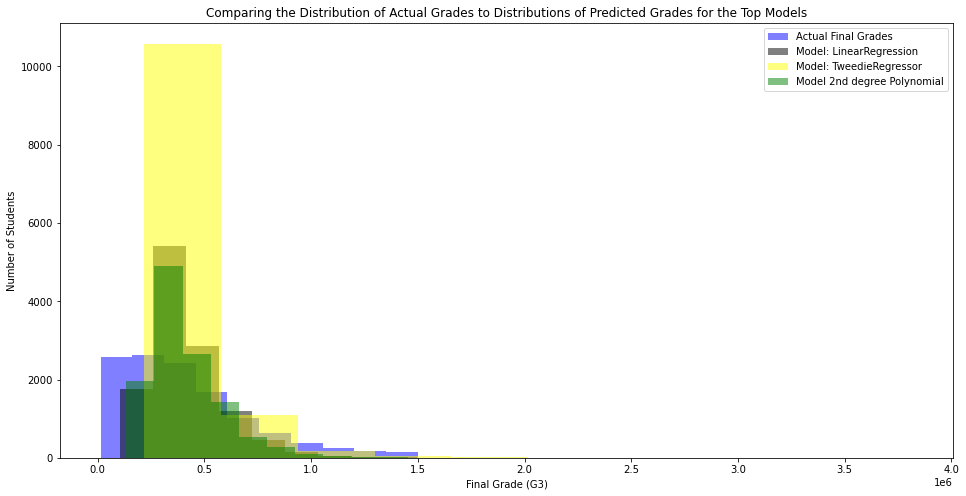

In [41]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_validate.taxvaluedollarcnt, color='blue', alpha=.5, label="Actual Final Grades")
plt.hist(y_validate.tax_pred_lm, color='black', alpha=.5, label="Model: LinearRegression")
plt.hist(y_validate.tax_pred_glm, color='yellow', alpha=.5, label="Model: TweedieRegressor")
plt.hist(y_validate.tax_pred_lm2, color='green', alpha=.5, label="Model 2nd degree Polynomial")
plt.xlabel("Final Grade (G3)")
plt.ylabel("Number of Students")
plt.title("Comparing the Distribution of Actual Grades to Distributions of Predicted Grades for the Top Models")
plt.legend()
plt.show()


In [42]:
y_train.head()

,taxvaluedollarcnt,tax_pred_lm,tax_pred_lars,tax_pred_glm,tax_pred_lm2,LinearRegression(normalize=True),LassoLars(),"TweedieRegressor(alpha=0, power=1)"
51278,119668,192158.332503,192672.407137,252202.709899,209528.307813,192158.332503,192672.407137,252202.709899
30633,919553,479905.599489,480175.548155,433802.187190,479875.337301,479905.599489,480175.548155,433802.187190
1069,390871,368139.724325,368037.254862,365092.605156,355644.030301,368139.724325,368037.254862,365092.605156
5125,58361,231798.252370,232242.175774,269998.264763,252439.214085,231798.252370,232242.175774,269998.264763
15166,396326,310613.736206,310714.773746,323369.756694,301693.865659,310613.736206,310714.773746,323369.756694


In [ ]:
lars = LassoLars(alpha=1.0)

lars.fit(X_train, y_train.taxvaluedollarcnt)

In [ ]:
#Instantiate TweedieRegressor and fit
glm = TweedieRegressor(power=0, alpha=1)

glm.fit(X_train, y_train.taxvaluedollarcnt)

In [ ]:
train.info()

In [ ]:
y_train.head()

In [ ]:
X_train.shape, X_validate.shape, X_test.shape

In [35]:
models = [lars, glm, lm]

for model in models:
    y_train[str(model)] = model.predict(X_train)
    rmse_train = sqrt(mean_squared_error(y_train['taxvaluedollarcnt'],
                                         y_train[str(model)]))
    
    y_validate[str(model)] = model.predict(X_validate)
    rmse_valid = sqrt(mean_squared_error(y_validate['taxvaluedollarcnt'],
                                         y_validate[str(model)]))
    
    print('RMSE for {} model on the train dataset: {}.'.format(model, round(rmse_train, 2)))
    print('RMSE for {} model on the validate dataset: {}.'.format(model, round(rmse_valid, 2)))
    print()

RMSE for LassoLars() model on the train dataset: 248133.89.
RMSE for LassoLars() model on the validate dataset: 250035.6.

RMSE for TweedieRegressor(alpha=0, power=1) model on the train dataset: 253936.96.
RMSE for TweedieRegressor(alpha=0, power=1) model on the validate dataset: 258211.5.

RMSE for LinearRegression(normalize=True) model on the train dataset: 248133.54.
RMSE for LinearRegression(normalize=True) model on the validate dataset: 250036.29.



In [36]:
#Rename my columns so they're easier to access
y_validate.rename(columns={'LinearRegression()': 'lm', 'LassoLars()': 'lars',
                        'TweedieRegressor(alpha=1, power=0)': 'glm'}, inplace=True)

In [37]:
y_validate.columns

Index(['taxvaluedollarcnt', 'tax_pred_lm', 'tax_pred_lars', 'tax_pred_glm',
       'tax_pred_lm2', 'LinearRegression(normalize=True)', 'lars',
       'TweedieRegressor(alpha=0, power=1)'],
      dtype='object')

KeyError: 'lm'

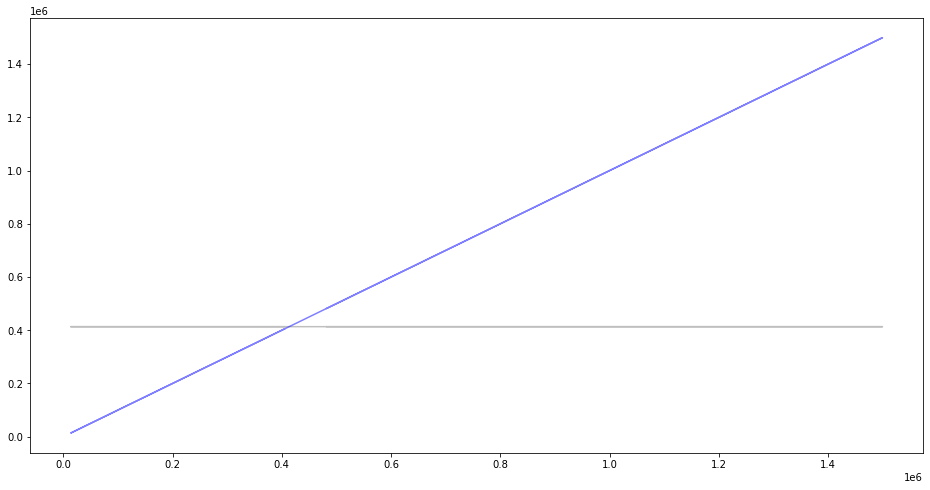

In [38]:
plt.figure(figsize=(16,8))

plt.plot(y_validate['taxvaluedollarcnt'], validate['baseline'], alpha=0.5,
         color='gray', label='_nolegend_')
plt.plot(validate['taxvaluedollarcnt'], validate['taxvaluedollarcnt'], alpha=0.5,
         color='blue', label='_nolegend_')

plt.scatter(y_validate['taxvaluedollarcnt'], y_validate['lm'], alpha=0.5,
            color='red', s=100, label='Linear Regression')
plt.scatter(y_validate['taxvaluedollarcnt'], y_validate['lars'], alpha=0.5,
            color='yellow', s=100, label='Lasso Lars')
plt.scatter(y_validate['taxvaluedollarcnt'], y_validate['glm'], alpha=0.5,
            color='green', s=100, label='Tweedie')

plt.legend()
plt.xlabel('Actual tip')
plt.ylabel('Predicted tip')
plt.title('Actual tip vs predicted tip across all models')

KeyError: 'lm'

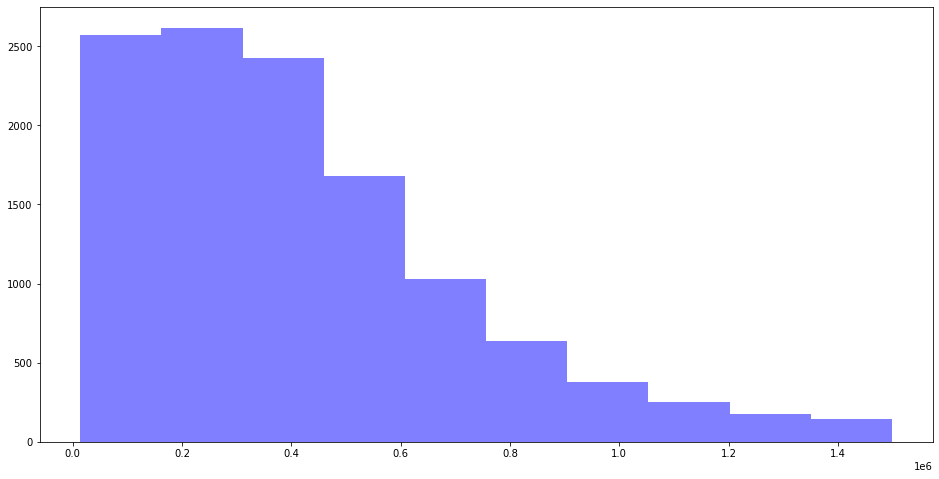

In [39]:
#Distribution of my models' predictions
plt.figure(figsize=(16,8))

plt.hist(y_validate['taxvaluedollarcnt'], color='blue', alpha=0.5, label='Actual Tip')
plt.hist(y_validate['lm'], color='red', alpha=0.5, label='Linear Regression')
plt.hist(y_validate['lars'], color='yellow', alpha=0.5, label='Lasso Lars')
plt.hist(y_validate['glm'], color='green', alpha=0.5, label='Tweedie')
plt.hist(y_validate['lm2'], color='grey', alpha=0.5, label='polynomial')

plt.xlabel('Tip')
plt.ylabel('Frequency')
plt.title('Frequency of tip amounts by model')
plt.legend()

In [ ]:
#tes the best model on the test dataset 

#Evaluate the best performing model on the test subset
y_test['lm'] = lm.predict(X_test)

rmse_test = sqrt(mean_squared_error(y_test['taxvaluedollarcnt'], y_test['lm']))

print('RMSE for OLS model on the test dataset: {}.'.format(rmse_test))